# Metadata

| Column                          | Description                                             | Type        |
|---------------------------------|---------------------------------------------------------|-------------|
| person_age                      | Age of the person                                       | Float       |
| person_gender                   | Gender of the person                                    | Categorical |
| person_education                | Highest education level                                 | Categorical |
| person_income                   | Annual income                                           | Float       |
| person_emp_exp                  | Years of employment experience                          | Integer     |
| person_home_ownership           | Home ownership status (e.g., rent, own, mortgage)       | Categorical |
| loan_amnt                       | Loan amount requested                                   | Float       |
| loan_intent                     | Purpose of the loan                                     | Categorical |
| loan_int_rate                   | Loan interest rate                                      | Float       |
| loan_percent_income             | Loan amount as a percentage of annual income            | Float       |
| cb_person_cred_hist_length      | Length of credit history in years                       | Float       |
| credit_score                    | Credit score of the person                              | Integer     |
| previous_loan_defaults_on_file  | Indicator of previous loan defaults                     | Categorical |
| loan_status (target variable)   | Loan approval status: 1 = approved; 0 = rejected        | Integer     |


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
loan_pred=pd.read_csv('D:\GL\Capstone\Loan_approval_prediction\Dataset\loan_data.csv')
loan_pred.head()

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\rockz\AppData\Local\Temp\ipykernel_9512\592600675.py:1: SyntaxWarning: invalid escape sequence '\G'
  loan_pred=pd.read_csv('D:\GL\Capstone\Loan_approval_prediction\Dataset\loan_data.csv')


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df=loan_pred.copy()

In [5]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
print("Shape of the dataset",df.shape)

Shape of the dataset (45000, 14)


In [7]:
df.size

630000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [12]:
df['loan_status']=df['loan_status'].astype('object')

In [13]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                        object
dtype: object

In [14]:
numeric_cols=df.select_dtypes(include=np.number).columns
print("numeric_cols: \n",numeric_cols)

numeric_cols: 
 Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')


In [15]:
categoric_cols=df.select_dtypes(include='object').columns
print("Categoric colummns:",categoric_cols)

Categoric colummns: Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [16]:
df[numeric_cols].describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000


* Average age is 27 years
* mis types age age 144 years
* 75% of population are of age 30 years
* 50% of population are of age 26 years
* Some people are present of age between 40 to 70 years
* Some people from 70 to 100 and some may be wrongly typed of age 100+

* Mean of income is 80319
* 50% of peoples' income is 67048
* 75% of peoples' income is 95789

* 25% of people are having 1 year of experience
* 50% of people are having 4 years of experience
* 75% of people are having 8 years of experience
* Some people are having experience of 125 years, which is a wrong data

* 50% of people have taken loan of rs 8000
* 75% of people have taken loas of rs 12237
* Some people are there who has taken loan amount of rs 35000

* 25% of people have been charged 8.5% as loan interest rate
* 50% of people have been charged 11% as loan interest rate
* 75% of people have been charged 12.9% as loan interest rate
* Some people are there who have been charged 20% as loan interest rate

* 25% of people take loan 7% of their annual income
* 50% of people take loan 12% of their annual income
* 75% of people take loan 19% of their annual income
* Some people also take loan which is 66% of their annual income

* Some of the people are having bad credit score as 390
* Also on the other hand some people are having a very good credit score as 850
* 25% of people are having credit score as 601
* 50% of people are having credit score as 640
* 75% of people are having credit score as 670


In [17]:
df[categoric_cols].describe().T

,count,unique,top,freq
person_gender,45000,2,male,24841
person_education,45000,5,Bachelor,13399
person_home_ownership,45000,4,RENT,23443
loan_intent,45000,6,EDUCATION,9153
previous_loan_defaults_on_file,45000,2,Yes,22858
loan_status,45000,2,0,35000


In [18]:
# Checking the unique values in each categoric column
t=1
for col in categoric_cols:
    print(f"{t}. Unique calues present in {col} are {df[col].unique()} and number of unique values present are {df[col].nunique()}")
    t+=1
    print()

1. Unique calues present in person_gender are ['female' 'male'] and number of unique values present are 2

2. Unique calues present in person_education are ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate'] and number of unique values present are 5

3. Unique calues present in person_home_ownership are ['RENT' 'OWN' 'MORTGAGE' 'OTHER'] and number of unique values present are 4

4. Unique calues present in loan_intent are ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION'] and number of unique values present are 6

5. Unique calues present in previous_loan_defaults_on_file are ['No' 'Yes'] and number of unique values present are 2

6. Unique calues present in loan_status are [1 0] and number of unique values present are 2



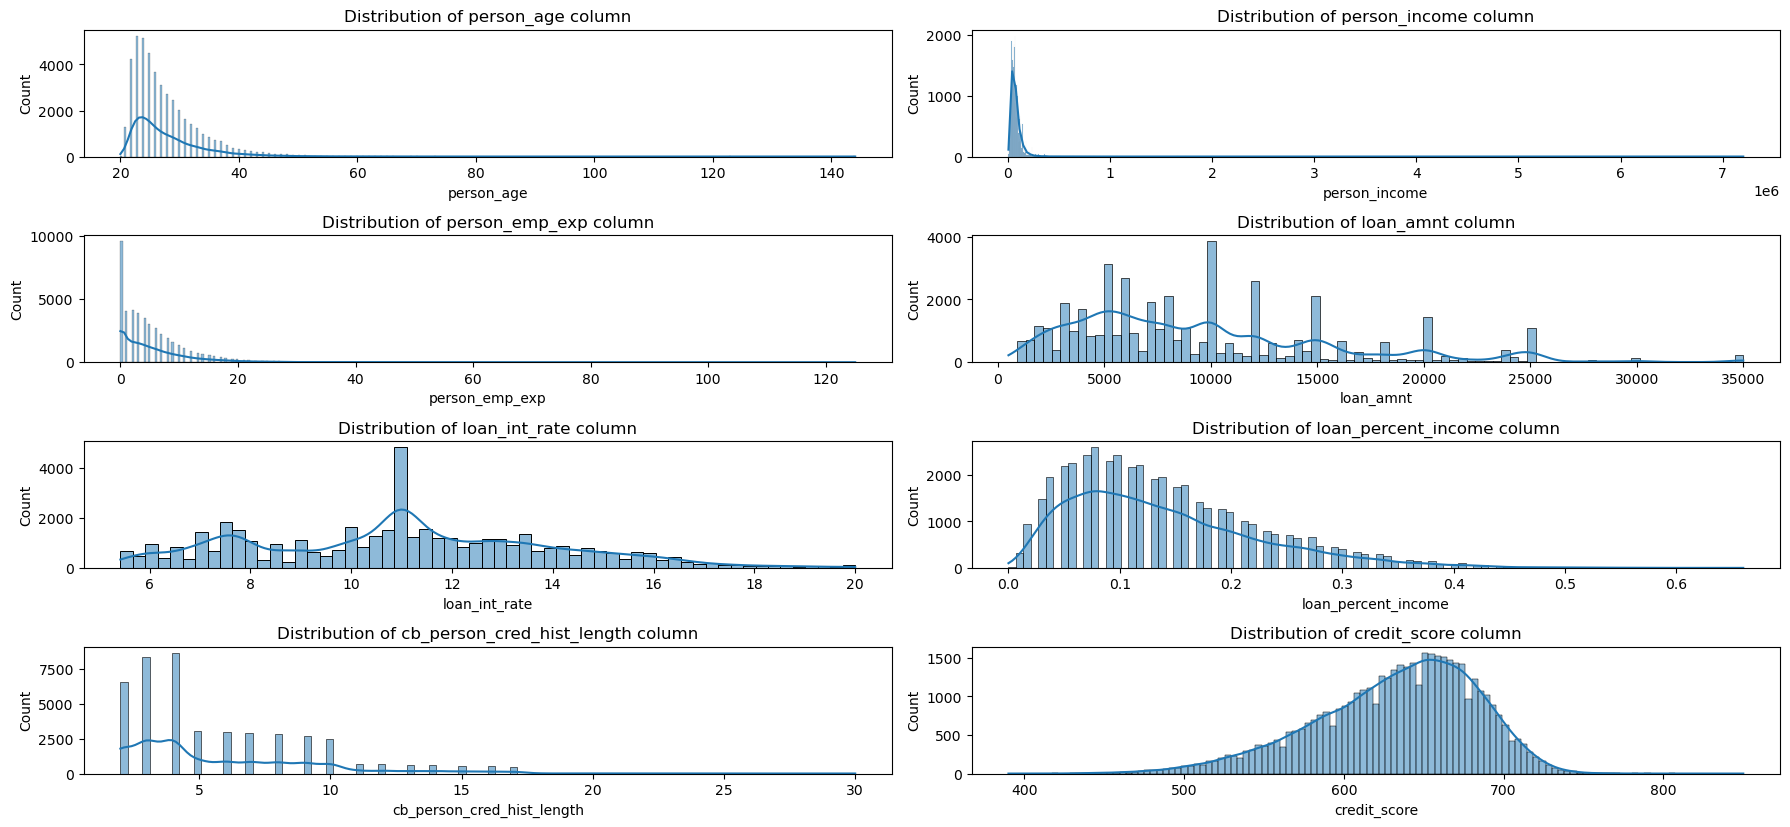

In [19]:
# Univariate Analysis
# Numerical Columns
plt.figure(figsize=(18,10))
t=1
for col in numeric_cols:
    plt.subplot(5,2,t)
    sns.histplot(data=df,x=col,kde=True)
    t+=1
    plt.title(f"Distribution of {col} column")
plt.tight_layout()
plt.show()

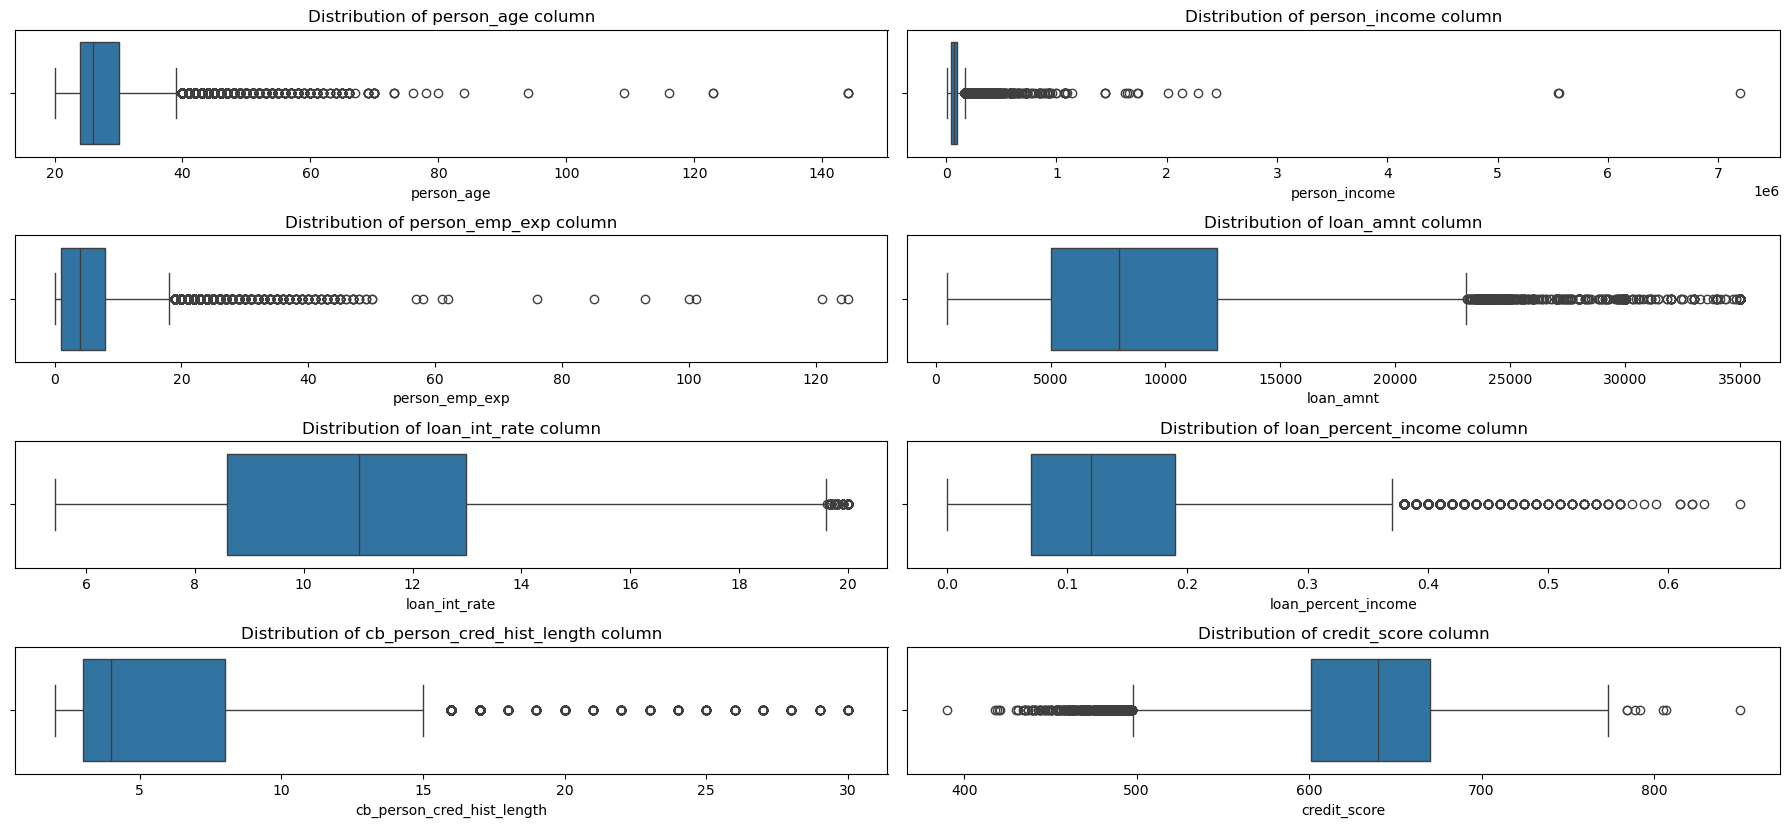

In [20]:
plt.figure(figsize=(18,10))
t=1
for col in numeric_cols:
    plt.subplot(5,2,t)
    sns.boxplot(data=df,x=col)
    t+=1
    plt.title(f"Distribution of {col} column")
plt.tight_layout()
plt.show()

# Uni-variate
### Categoric


In [21]:
categoric_cols.nunique()

6

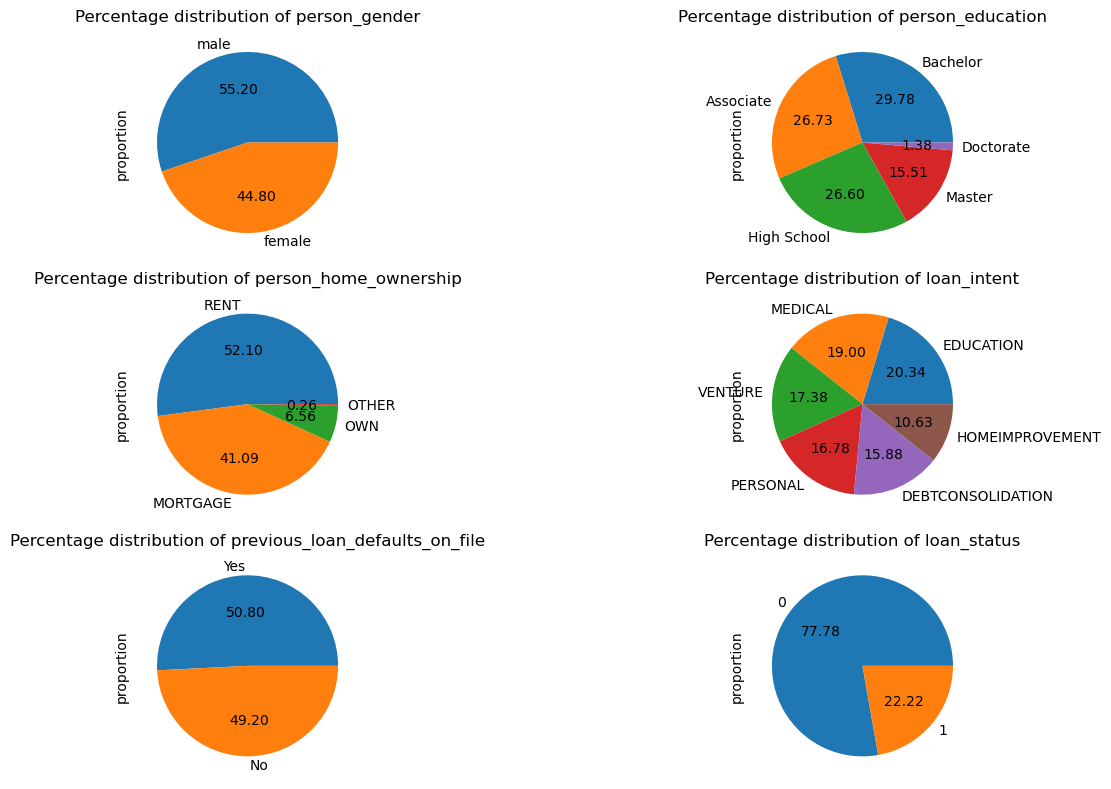

In [22]:
plt.figure(figsize=(15,8))
t=1
for col in categoric_cols:
    plt.subplot(3,2,t)
    df[col].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')
    t+=1
    plt.title(f"Percentage distribution of {col}")
    
plt.tight_layout()
plt.show()

* Here the target variable seems to be not balanced perfectly
* The person who is taking loan, 30% chance that he/she has done bachelors degree
* chance of Person who is either an associate or has done high schooling and taking loan is more or less 26%
* chance of Some people having done doctorate and taking loan is 1.38%
* chance of some people having done masters and taking loan is 15%
  
* 6% of people have their own home
* 52% of people using rental house
* 41% of people have put their house in mortgage
  
* Most of the population are taking loan for medical and educational purposes which is 19% and 20%
* 
* 

In [26]:
df[df['person_age']>100]['person_emp_exp']

81       125
183      121
575      101
747      100
32297    124
37930     93
38113     85
Name: person_emp_exp, dtype: int64